In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')
import json

### Extracting and merging the data

In [3]:
# Load Order Data (TSV)
order_data = pd.read_csv('Order.tsv', sep='\t')

# Load Order Breakdown Data (JSON)
with open('Order_breakdown.json') as json_file:
    order_breakdown_data = json.load(json_file)

In [4]:
# Convert the Order Breakdown Data to a DataFrame
order_breakdown_df = pd.DataFrame(order_breakdown_data)
# Merge the two DataFrames based on a common key, for example, "Product Name"
merged_data = pd.merge(order_data, order_breakdown_df, on='Order ID')
merged_data.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


### Data preprocessing

In [5]:
merged_data.shape

(8047, 19)

In [6]:
merged_data.dtypes

Order ID            object
Order Date          object
Customer Name       object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Ship Mode           object
State               object
Days to Ship         int64
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Profit               int64
Quantity             int64
Category            object
Sub-Category        object
dtype: object

In [7]:
merged_data.describe()

,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4.007332,0.110047,29.793078,291.845657,35.198211,3.772089
std,1.741232,0.181773,88.817656,485.212156,178.125844,2.203369
min,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,3.000000,0.000000,0.000000,48.000000,1.000000,2.000000
50%,4.000000,0.000000,0.000000,117.000000,14.000000,3.000000
75%,5.000000,0.100000,22.000000,313.000000,47.000000,5.000000
max,7.000000,0.850000,1700.000000,6517.000000,2476.000000,14.000000


In [8]:
# Save the merged data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)
df = merged_data.copy()


In [9]:
merged_data.drop_duplicates(inplace=True)
merged_data.isnull().sum( )

Order ID           0
Order Date         0
Customer Name      0
City               0
Country            0
Region             0
Segment            0
Ship Date          0
Ship Mode          0
State              0
Days to Ship       0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64

In [10]:
# Handle null values (if any)
merged_data.fillna(0, inplace=True)

## EDA

In [11]:
correlation_matrix1 = merged_data.corr()
print(correlation_matrix1)

                 Days to Ship  Discount  Actual Discount     Sales    Profit  \
Days to Ship         1.000000  0.017547        -0.018932 -0.004393  0.014172   
Discount             0.017547  1.000000         0.426090 -0.026424 -0.351359   
Actual Discount     -0.018932  0.426090         1.000000  0.478885 -0.395889   
Sales               -0.004393 -0.026424         0.478885  1.000000  0.441218   
Profit               0.014172 -0.351359        -0.395889  0.441218  1.000000   
Quantity             0.001623  0.003633         0.207130  0.353415  0.098664   

                 Quantity  
Days to Ship     0.001623  
Discount         0.003633  
Actual Discount  0.207130  
Sales            0.353415  
Profit           0.098664  
Quantity         1.000000  


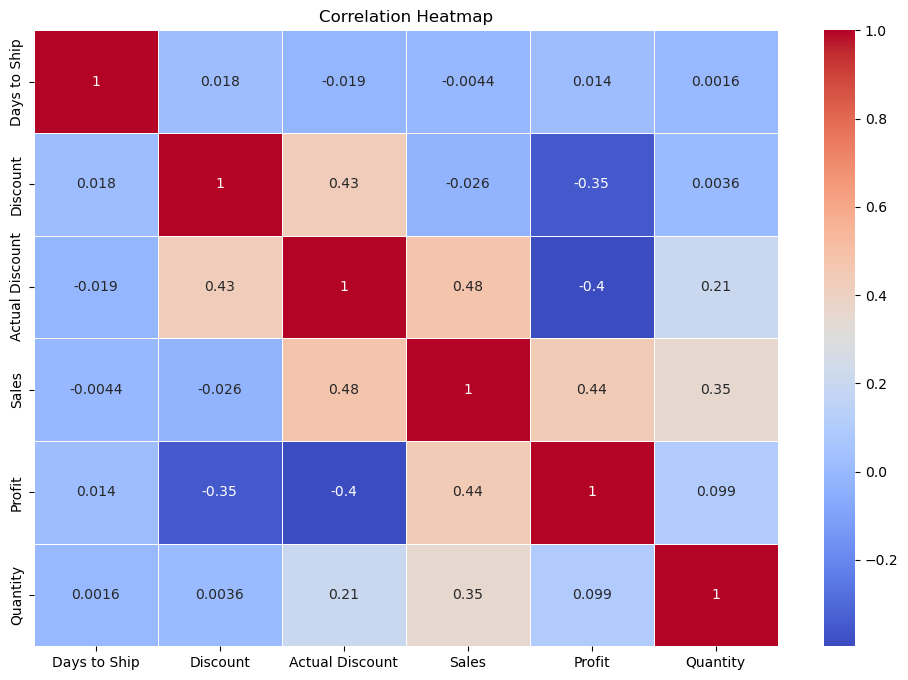

In [12]:
# Correlation heatmap
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


count    8045.000000
mean      291.903170
std       485.258616
min         3.000000
25%        48.000000
50%       117.000000
75%       313.000000
max      6517.000000
Name: Sales, dtype: float64


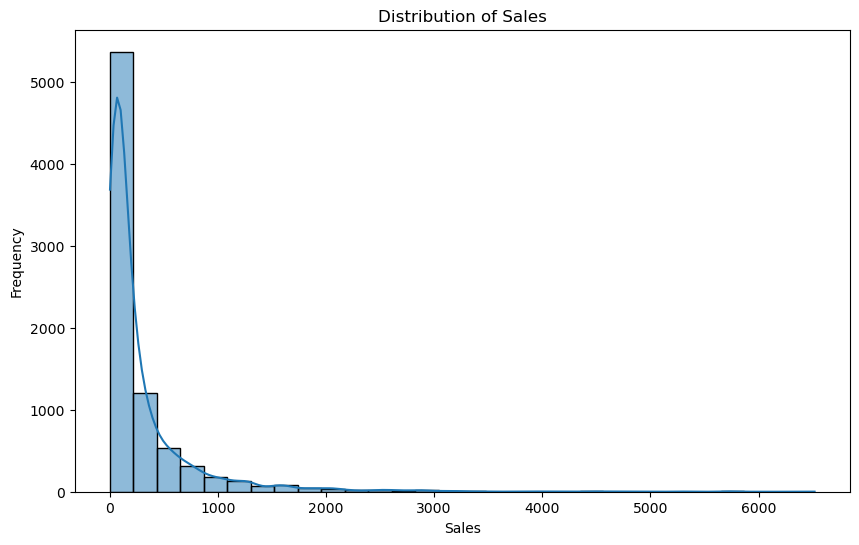

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics of the 'Sales' column
print(merged_data['Sales'].describe())

# Distribution plot of 'Sales'
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


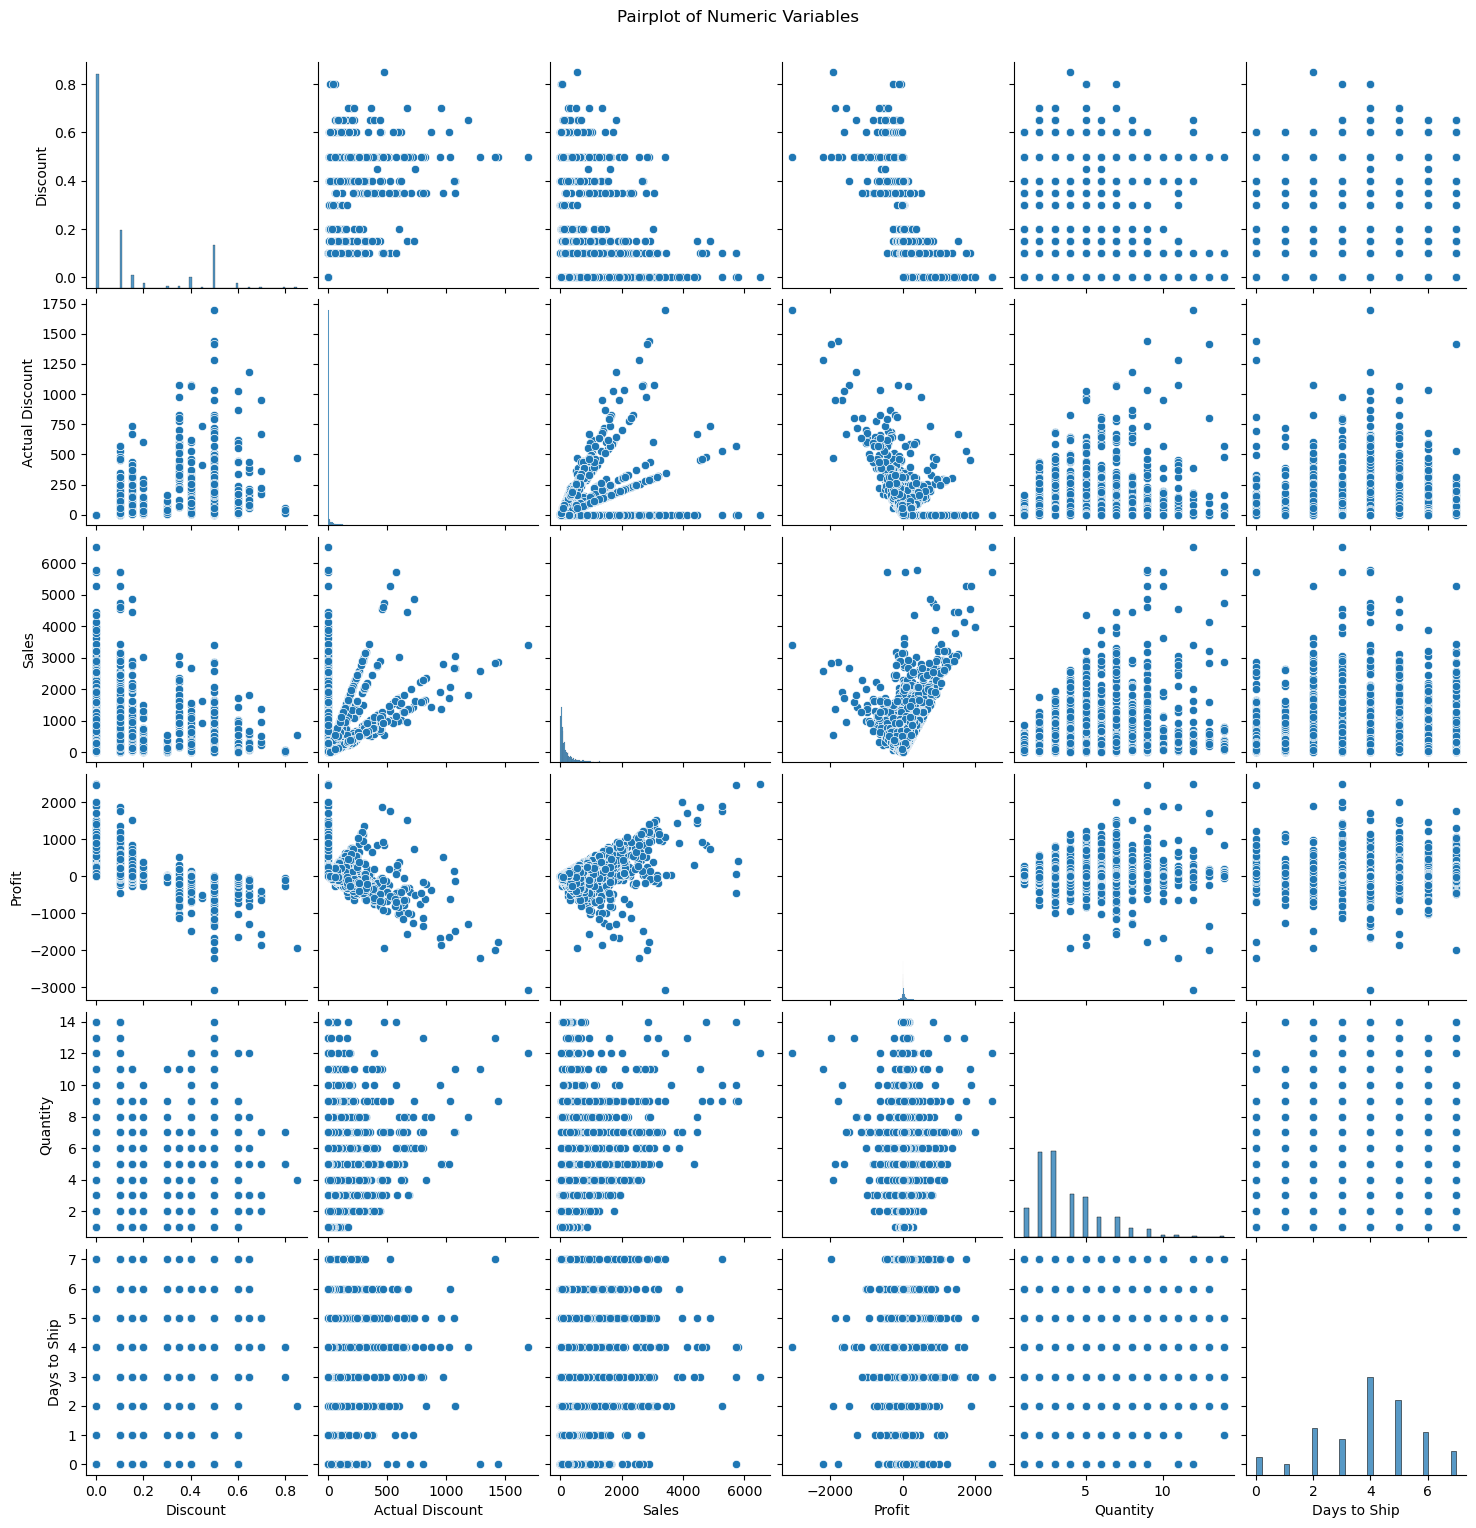

In [14]:

# Pairplot for selected numeric columns
numeric_columns = ['Discount', 'Actual Discount', 'Sales', 'Profit', 'Quantity', 'Days to Ship']
sns.pairplot(data=merged_data[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

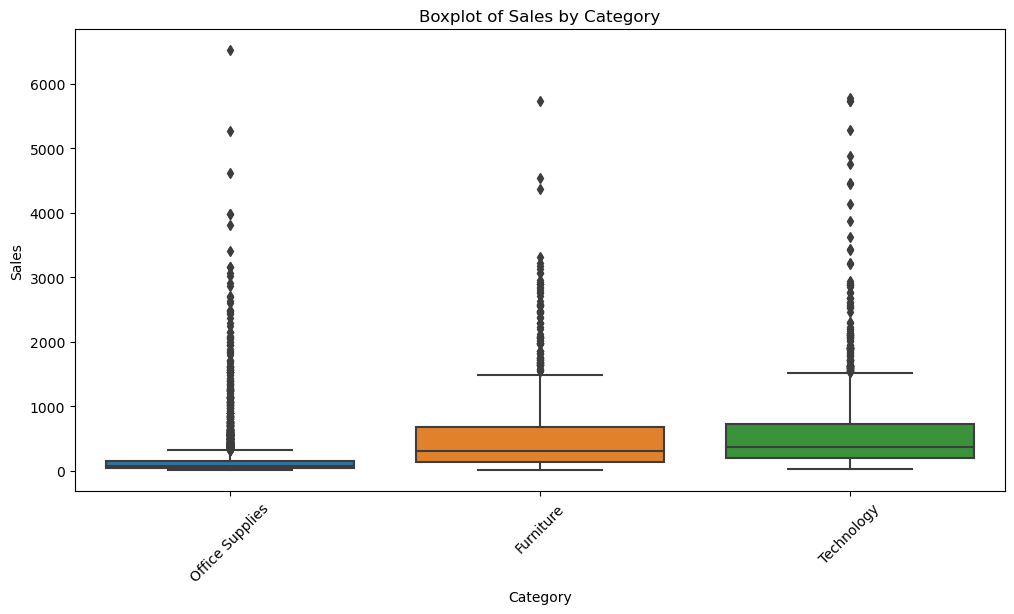

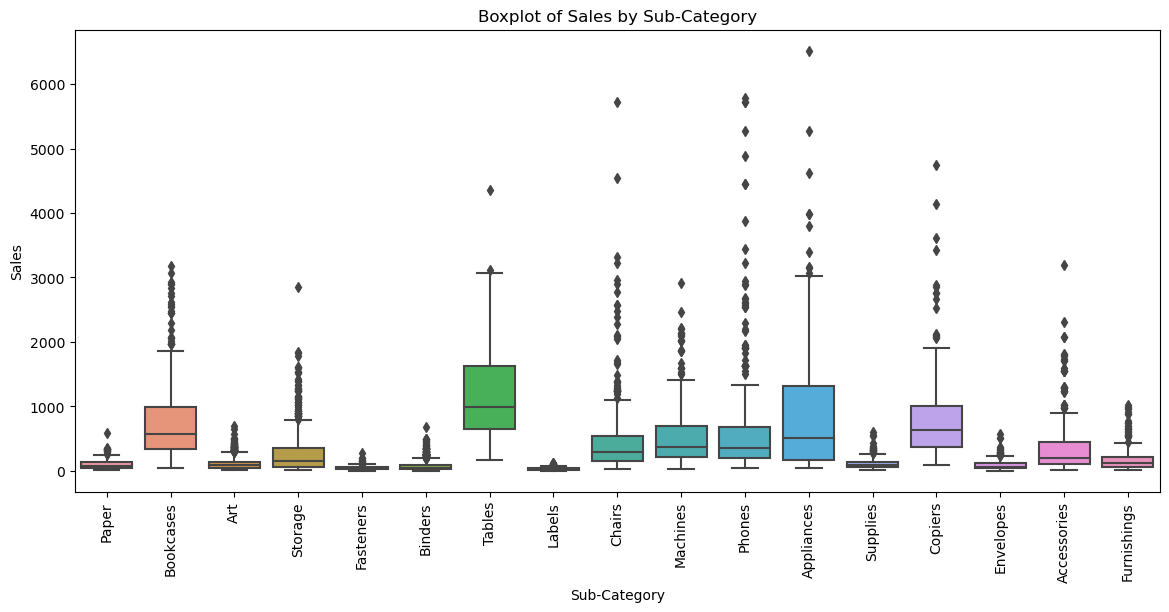

In [15]:
# Boxplot of 'Category' vs. 'Sales'
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Category', y='Sales')
plt.title('Boxplot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Boxplot of 'Sub-Category' vs. 'Sales'
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_data, x='Sub-Category', y='Sales')
plt.title('Boxplot of Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

In [16]:
 #- Extract features from Date columns
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
merged_data['Order Day of Week'] = merged_data['Order Date'].dt.dayofweek
merged_data['Order Day of Year'] = merged_data['Order Date'].dt.dayofyear
merged_data['Order Year'] = merged_data['Order Date'].dt.year

merged_data['Ship Date'] = pd.to_datetime(merged_data['Ship Date'])
merged_data['Ship Day of Week'] = merged_data['Ship Date'].dt.dayofweek
merged_data['Ship Day of Year'] = merged_data['Ship Date'].dt.dayofyear
merged_data['Ship Year'] = merged_data['Ship Date'].dt.year

# Drop irrelevant columns
merged_data.drop(['Order ID','Order Date','Customer Name','City','Ship Date','State','Profit', 'Region', 'Segment', 'Category'], axis=1, inplace=True)



In [17]:
'''# Handle non-numeric columns (Category and Sub-Category) using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Country', 'Sub-Category', 'Ship Mode']
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoded_features = encoder.fit_transform(merged_data[categorical_cols])

# Get feature names for one-hot encoded columns
feature_names = []
for col, categories in zip(categorical_cols, encoder.categories_):
    feature_names.extend([f"{col}_{category}" for category in categories[1:]])

encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
merged_data = pd.concat([merged_data, encoded_df], axis=1)
merged_data'''


'# Handle non-numeric columns (Category and Sub-Category) using one-hot encoding\nfrom sklearn.preprocessing import OneHotEncoder\n\ncategorical_cols = [\'Country\', \'Sub-Category\', \'Ship Mode\']\nencoder = OneHotEncoder(handle_unknown=\'ignore\', drop=\'first\', sparse=False)\nencoded_features = encoder.fit_transform(merged_data[categorical_cols])\n\n# Get feature names for one-hot encoded columns\nfeature_names = []\nfor col, categories in zip(categorical_cols, encoder.categories_):\n    feature_names.extend([f"{col}_{category}" for category in categories[1:]])\n\nencoded_df = pd.DataFrame(encoded_features, columns=feature_names)\nmerged_data = pd.concat([merged_data, encoded_df], axis=1)\nmerged_data'

### Preparing data for ML modelling

In [18]:
# Identify the required columns and target variable for machine learning modeling
X = merged_data.drop(['Sales'], axis=1)
y = merged_data['Sales']
    

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6436, 14)
(1609, 14)
(6436,)
(1609,)


In [27]:
'''# hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)
'''

'# hyperparameters and their possible values\nparam_grid = {\n    \'max_depth\': [None, 10, 20, 30],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4]  # Minimum number of samples required to be at a leaf node\n}\n\n# Initialize the Decision Tree Regressor\ndt_regressor = DecisionTreeRegressor(random_state=42)\n\n# Initialize GridSearchCV with cross-validation\ngrid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\n\n# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nprint("Best Hyperparameters:", best_params)\n\n# Get the best model\nbest_model = grid_search.best_estimator_\n\n# Evaluate the best model on the test set\ny_pred = best_model.predict(X_test)\nmse = mean_squared_error(y_test, y_pred)\nprint("Mean Square

In [28]:
a = {'Model':[],'r2 score':[],'MSE':[],'RMSE':[],'MAE':[]}

def evaluate(model,model_name,X_test,y_test,ypred):
    mse = mean_squared_error(y_test, ypred)
    r2 = r2_score(y_test, ypred)
    mae = mean_absolute_error(y_test, ypred)
    rmse = mean_squared_error(y_test, ypred,squared=False)
    print('mean squared error',mse)
    print('r2 score',r2)
    print('mean absolute error',mae)
    print('root mean squared error',rmse)
    a['Model'].append(model_name)
    a['r2 score'].append(r2)
    a['MSE'].append(mse)
    a['RMSE'].append(rmse)
    a['MAE'].append(mae)

def m_score(model):
    print('Training Score',model.score(X_train,y_train))   # Trainig Accuracy
    print('Testing Score',model.score(X_test,y_test))      # Testing Accuracy

### Applying Linear Regression

In [29]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')
# Initialize the linear regression model
lr = LinearRegression()
pipe_lr = Pipeline([('CT',CT),('Model', lr)])
# Train the model
pipe_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = pipe_lr.predict(X_test)
print(y_pred_lr)

# Evaluate the model 
evaluate(pipe_lr,'Lin_Reg',X_test,y_test,y_pred_lr)
m_score(pipe_lr)

[-120.09104345  336.10445757   -3.54920317 ...  557.46366511  664.10546902
  309.53947698]
mean squared error 67536.13011363405
r2 score 0.6437793393197185
mean absolute error 145.04301327121937
root mean squared error 259.87714426942983
Training Score 0.8240375496632454
Testing Score 0.6437793393197185


### Regularisation Techniques (Lasso and Ridge) 

In [30]:
!pip install Lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [31]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

las = Lasso()
# Fit the model on the training data
pipe_las = Pipeline([('CT',CT),('Model',las)])
# Fit the model on the training data
pipe_las.fit(X_train, y_train)
# Make predictions on the test set
ypred_las = pipe_las.predict(X_test)
# Computing Training and testing score
m_score(pipe_las)
# Evaluate the model 
evaluate(pipe_las,'Lasso_Reg',X_test,y_test,ypred_las)

Training Score 0.5569176791761088
Testing Score 0.5270751643235596
mean squared error 89662.15821176
r2 score 0.5270751643235596
mean absolute error 171.77495435497815
root mean squared error 299.43640094644473


In [32]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

rid = Ridge()
# Fit the model on the training data
pipe_rid = Pipeline([('CT',CT),('Model',rid)])
# Fit the model on the training data
pipe_rid.fit(X_train, y_train)
# Make predictions on the test set
ypred_rid = pipe_rid.predict(X_test)
# Computing Training and testing score
m_score(pipe_rid)
evaluate(pipe_rid,'Ridge_Reg',X_test,y_test,ypred_rid)

Training Score 0.7971809136069388
Testing Score 0.6804253362729683
mean squared error 60588.389312603314
r2 score 0.6804253362729683
mean absolute error 144.2410619533043
root mean squared error 246.1470887753973


### Decision Tree Regressor

In [33]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

dt = DecisionTreeRegressor(random_state=2023,max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10)
pipe_dt = Pipeline([('CT',CT),('Model',dt)])
# Fit the model on the training data
pipe_dt.fit(X_train, y_train)
dt_y_pred = pipe_dt.predict(X_test)

# Evaluate the model 
evaluate(dt,'Decision_tree',X_test,y_test,dt_y_pred)
m_score(pipe_dt)

mean squared error 85241.61849693496
r2 score 0.5503913889151802
mean absolute error 129.2240372103706
root mean squared error 291.9616729931087
Training Score 0.7836781683287884
Testing Score 0.5503913889151802


### Random Forest Regressor

In [34]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')
rf = RandomForestRegressor(random_state=2023,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10)
pipe_rf = Pipeline([('CT',CT),('Model',rf)])
# Fit the model on the training data
pipe_rf.fit(X_train, y_train)
rf_y_pred = pipe_rf.predict(X_test)
'''# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance_df)'''
# Evaluate the model 
evaluate(rf,'Random_forest',X_test,y_test,rf_y_pred)
m_score(pipe_rf)

mean squared error 58210.550673009675
r2 score 0.6929672934411086
mean absolute error 114.97427919357247
root mean squared error 241.2686276186974
Training Score 0.7950420185575773
Testing Score 0.6929672934411086


### knn_Regressor

In [35]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

knn_Regressor = KNeighborsRegressor(n_neighbors=5)

pipe_knn = Pipeline([('CT',CT),('Model',knn_Regressor)])
# Fit the model on the training data
pipe_knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = pipe_knn.predict(X_test)

evaluate(knn_Regressor,'KNN',X_test,y_test,knn_pred)

m_score(pipe_knn)

mean squared error 152801.11453076443
r2 score 0.19404748422439033
mean absolute error 224.25133623368552
root mean squared error 390.89783132010905
Training Score 0.46629612408298515
Testing Score 0.19404748422439033


### XG boost

In [36]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

from xgboost import XGBRegressor
# Initialize the XGBoost model
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.5)  

# Create a pipeline with preprocessing and the XGBoost model
pipe_xg = Pipeline([('CT',CT),('Model', xgboost_model)])
# Train the model
pipe_xg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xg = pipe_xg.predict(X_test)

# Evaluate the model using your evaluation function or metrics
evaluate(xgboost_model,'xgBoost Regressor',X_test, y_test, y_pred_xg)
m_score(pipe_xg)

mean squared error 46702.711723357475
r2 score 0.7536656187190004
mean absolute error 88.20350900592457
root mean squared error 216.10810193826023
Training Score 0.9616981577708761
Testing Score 0.7536656187190004


### Gradient boosting

In [37]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')
Model =  GradientBoostingRegressor()
pipe_gb = Pipeline([('CT',CT),('Model', Model)])
pipe_gb.fit(X_train, y_train)

ypred_gb = pipe_gb.predict(X_test)

evaluate(Model,'Gradient Boosting Regressor',X_test, y_test, ypred_gb)
m_score(pipe_gb)

mean squared error 56941.76845772371
r2 score 0.6996595104548478
mean absolute error 117.01381084946692
root mean squared error 238.62474401814183
Training Score 0.7936787308031643
Testing Score 0.6996595104548478


In [38]:
!pip install lightgbm

In [39]:
from lightgbm import LGBMRegressor
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')

# Initialize the LightGBM model
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1)  

# Create a pipeline with the model
pipe_lgbm = Pipeline([('CT',CT),('Model', lgbm)])

# Train the model
pipe_lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = pipe_lgbm.predict(X_test)

# Evaluate the model (you can replace evaluate and m_score with your evaluation functions)
evaluate(lgbm, 'LightGBM', X_test, y_test, y_pred_lgbm)
m_score(pipe_lgbm)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 6436, number of used features: 45
[LightGBM] [Info] Start training from score 294.244717
mean squared error 49873.56124957374
r2 score 0.7369409098669235
mean absolute error 99.91254335887686
root mean squared error 223.32389314530081
Training Score 0.858590830881322
Testing Score 0.7369409098669235


In [40]:
summary = pd.DataFrame(a)
summary

,Model,r2 score,MSE,RMSE,MAE
0,Lin_Reg,0.643779,67536.130114,259.877144,145.043013
1,Lasso_Reg,0.527075,89662.158212,299.436401,171.774954
2,Ridge_Reg,0.680425,60588.389313,246.147089,144.241062
3,Decision_tree,0.550391,85241.618497,291.961673,129.224037
4,Random_forest,0.692967,58210.550673,241.268628,114.974279
5,KNN,0.194047,152801.114531,390.897831,224.251336
6,xgBoost Regressor,0.753666,46702.711723,216.108102,88.203509
7,Gradient Boosting Regressor,0.699660,56941.768458,238.624744,117.013811
8,LightGBM,0.736941,49873.561250,223.323893,99.912543


In [41]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)
print(y.shape)

(6436, 14)
(1609, 14)
(8045, 14)
(8045,)


### Fitting the model on 20 randomly selected data points

In [42]:
CT = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(handle_unknown='ignore',drop = 'first', sparse=False), ['Country','Product Name', 'Sub-Category', 'Ship Mode'])],
                         remainder='passthrough')


# Initialize the best model
Best_model = XGBRegressor(n_estimators=100, learning_rate=0.1)  

# Create a pipeline with preprocessing and the XGBoost model
pipe_best = Pipeline([('CT',CT),('Model', Best_model)])
# Fit the model on the Actual data
pipe_best.fit(X, y)


# Evaluate the model using your evaluation function or metrics
evaluate(Best_model,'xgBoost Regressor',X_test, y_test, y_pred_xg)
m_score(pipe_best)



mean squared error 46702.711723357475
r2 score 0.7536656187190004
mean absolute error 88.20350900592457
root mean squared error 216.10810193826023
Training Score 0.8781396357436897
Testing Score 0.8827200027059634


In [43]:
#Predict on New Data
#Create a new dataset with 20 random data points from the car details dataset
sample_data = merged_data.sample(n=20, random_state=2023)
sample_data.shape
sample_data.head()

,Country,Ship Mode,Days to Ship,Product Name,Discount,Actual Discount,Sales,Quantity,Sub-Category,Order Day of Week,Order Day of Year,Order Year,Ship Day of Week,Ship Day of Year,Ship Year
6463,Netherlands,Priority,3,"Boston Pencil Sharpener, Water Color",0.5,22.0,44,3,Art,6,192,2016,2,195,2016
7708,Germany,Economy,5,"Ikea Stackable Bookrack, Mobile",0.1,22.5,225,2,Bookcases,0,333,2016,5,338,2016
7695,France,Priority,2,"Wilson Jones 3-Hole Punch, Durable",0.0,0.0,59,2,Binders,6,332,2016,1,334,2016
1848,Germany,Economy,4,"Rogers Lockers, Industrial",0.1,114.5,1145,6,Storage,6,117,2014,3,121,2014
6469,Italy,Economy,5,"Sauder 3-Shelf Cabinet, Pine",0.0,0.0,504,3,Bookcases,0,193,2016,5,198,2016


In [60]:
sample_data['Quantity'].describe()

count    20.000000
mean      3.150000
std       2.345769
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: Quantity, dtype: float64

In [45]:
sample_data['Sales'].value_counts()

44      1
225     1
242     1
200     1
520     1
14      1
646     1
250     1
56      1
42      1
90      1
58      1
171     1
107     1
180     1
27      1
504     1
1145    1
59      1
99      1
Name: Sales, dtype: int64

In [61]:
sample_data.to_csv('sample_major.csv')

X_test2 = sample_data.drop("Sales", axis=1)  # Assuming "sales" is the target variable
y_test2 = sample_data["Sales"]

### Saving and Loading the Best Model:

In [62]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(pipe_best, model_file)

# Load the model
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test2)


print('Predictions:', predictions)

Predictions: [ 35.05173  326.15598   55.73944  976.02185  627.5404    55.027443
 297.5309    81.67787  180.81273   81.67787   83.018654 118.209465
  55.73944  383.8192   588.759     32.38638  406.7848   297.5309
 297.5309    97.037926]


In [63]:
Results = pd.DataFrame({"Actual Profit": y_test2, "Predicted Profit": predictions})
print(Results)

      Actual Profit  Predicted Profit
6463             44         35.051731
7708            225        326.155975
7695             59         55.739441
1848           1145        976.021851
6469            504        627.540405
6258             27         55.027443
6645            180        297.530914
6688            107         81.677872
4359            171        180.812729
504              58         81.677872
1000             90         83.018654
4677             42        118.209465
1219             56         55.739441
7593            250        383.819214
7557            646        588.758972
446              14         32.386379
7620            520        406.784790
350             200        297.530914
4069            242        297.530914
3198             99         97.037926
